In [1]:
import os

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def combine_data(map_df, data_filename, map_df_index="constituency", data_df_index="name"):
    data_df = pd.read_csv(data_filename, encoding='latin-1')
    data_df.fillna("No MP", inplace=True)
    combined_df = map_df.set_index(map_df_index).join(data_df.set_index(data_df_index)).reset_index()
    combined_df["mp"].fillna("No MP", inplace=True)
    combined_df["signature_count"].fillna(0, inplace=True)
    return combined_df

In [3]:
def get_signature_percentage(combined_df, electorate_filename, combined_df_index="constituency", electorate_df_index="constituency_name"):
    electorate_df = pd.read_csv(electorate_filename)
    combined_df = combined_df.set_index(combined_df_index).join(electorate_df.set_index(electorate_df_index)).reset_index()
    combined_df["electorate"].fillna(1e10, inplace=True)  # so percentages go to 0, not NaN
    combined_df["mp"].fillna("No MP", inplace=True)
    combined_df["signature_count"].fillna(0, inplace=True)

    combined_df["signature_pc"] = 100 * combined_df["signature_count"] / combined_df["electorate"]
    return combined_df

In [4]:
def get_plot(combined_df, column, cmap="viridis", vmin=0.0, vmax=100.0, plot_name=None, save_name=None):
    fig = combined_df.plot(column=column, cmap=cmap, figsize=(10,10), linewidth=0.8, 
                           edgecolor='0.8', vmin=vmin, vmax=vmax,
                           legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))    
    fig.axis('off')
    
    if plot_name is not None:
        fig.set_title(plot_name,
                      fontdict={'fontsize': '25',
                                'fontweight' : '3'})
    
    chart = fig.get_figure()

    if save_name is not None:
        chart.savefig(save_name, dpi=300)

    return chart

In [5]:
def plot_over_time(data_folder, electorate_filename, shapefile, save_folder=None):
    # Get the map
    map_df = gpd.read_file(shapefile).drop(["objectid"], axis=1).rename(columns={"pcon15nm":"constituency"})
        
    for _, _, files in os.walk(data_folder):
        for i, file in enumerate(files):
            if file.endswith(".csv"):
                data_filename = os.path.join(data_folder, file)
                combined_df = combine_data(map_df, data_filename)
                combined_df = get_signature_percentage(combined_df, electorate_filename)
                
                plot_save_name = "{}.png".format(i)
                plot_save_name = os.path.join(save_folder, plot_save_name) if save_folder is not None else plot_save_name
                chart = get_plot(combined_df, "signature_pc", vmax=40.0, 
                                 plot_name="Revoke Article 50 Signature %", save_name=plot_save_name)

In [6]:
data_folder = os.path.join("..", "data", "information", "revoke_article_50")
electorate_filename = os.path.join("..", "data", "information", "ge2015_electorate.csv")
shapefile = os.path.join("..", "data", "boundaries", "uk_generalized_2015.shp")
save_folder = os.path.join("..", "plots", "revoke_article_50")

KeyError: 'name'

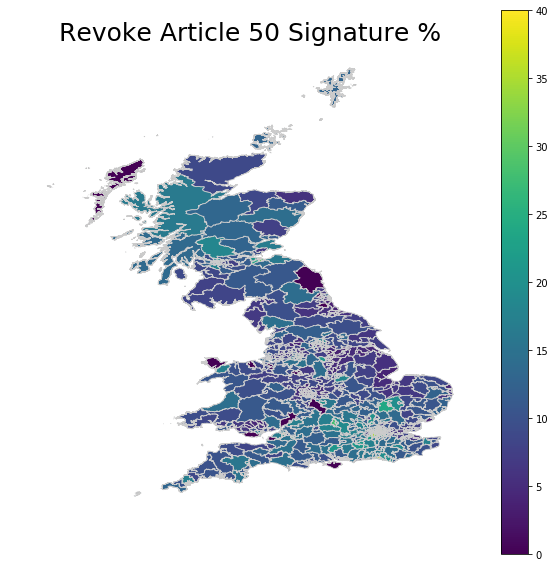

In [7]:
plot_over_time(data_folder, electorate_filename, shapefile, save_folder=save_folder)